# HOL-N-ONE Leftover Tabulation (Location | Daily Report)

In [436]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

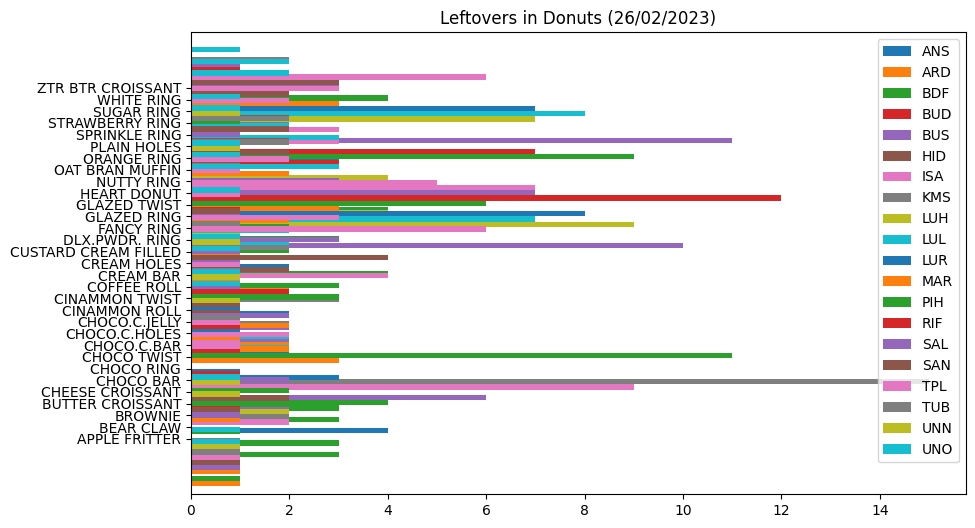

In [437]:
df = pd.read_csv('26_02_2023_hole copy.csv', index_col=0)
df.dropna(axis=1, how='all', inplace=True)

df.plot(kind='barh', title='Leftovers in Donuts (26/02/2023)', figsize=(10, 6), width=9)
plt.show()

Run the cell below if you want to see the sum of leftovers for each branch, on an individual branch basis.

In [438]:

# for col in df.columns:
# # plot the data for this column (branch)
#     fig, ax = plt.subplots(figsize=(8, 5))
#     ax.barh(df.index, df[col], alpha=0.5, label='Bar plot')
#     ax.set_title(f"{col} Leftovers")
#     ax.set_ylabel('Food Item')
#     ax.set_xlabel('No. Leftovers')
#     ax.legend()
#     plt.show()

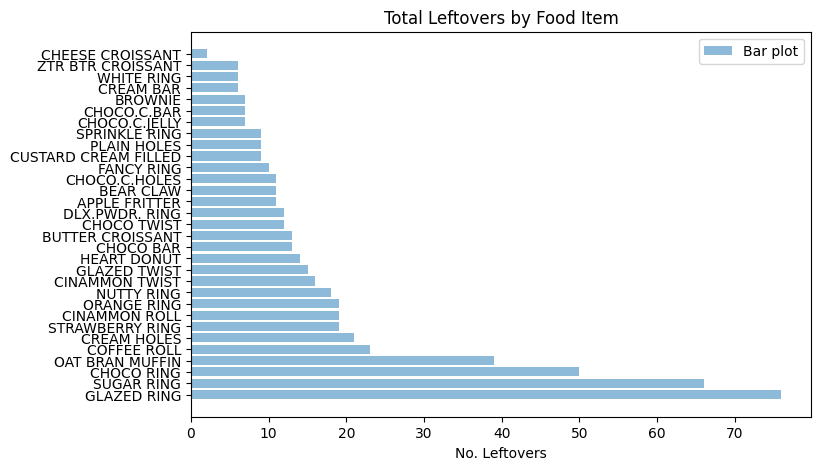

In [439]:
# Calculate the total number of leftovers for each food item across all branches
total_leftovers = df.sum(axis=1)

# Sort the food items by their total leftovers in descending order
sorted_leftovers = total_leftovers.sort_values(ascending=False)

# Plot the total leftovers for each food item in a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(sorted_leftovers.index, sorted_leftovers.values, alpha=0.5, label='Bar plot')
ax.set_title('Total Leftovers by Food Item')
ax.set_xlabel('No. Leftovers')
# adjust font size
mpl.rcParams.update({'font.size': 10})
ax.legend()
plt.show()


In [440]:
import pandas as pd
import folium
from branca.element import MacroElement
from jinja2 import Template

# Read the data from the CSV file
df = pd.read_csv('26_02_2023_hole copy.csv')

df = df.apply(pd.to_numeric, errors='coerce')

# Drop any rows or columns with missing values
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, how='all', inplace=True)

# Read the latitude and longitude coordinates from a separate CSV file
coords = pd.read_csv('hole-n-one_locations.csv', header=None)

# Create a dictionary mapping branch names to latitude and longitude coordinates
branch_coords = {}
for index, row in coords.iterrows():
    branch_coords[row[0]] = (row[2], row[1])

# Calculate the largest sum amount of leftover donuts for each branch
largest_sum = df.max().max()

# Create a Folium map centered on the first branch in the DataFrame
map = folium.Map(location=list(branch_coords.values())[0],tiles='openstreetmap', zoom_start=12)

# Create a colormap for the circle markers
colormap = folium.LinearColormap(colors=['#377eb8', '#ff7f00'], vmin=0, vmax=70)

# Iterate over the branches in the DataFrame and add a circle marker to the map for each branch
for branch in df.columns:
    # Get the latitude and longitude coordinates for the branch
    coords = branch_coords[branch]
    # Calculate the sum amount of leftover donuts for the branch
    sum_leftover = df[branch].sum()
    # Calculate the size of the circle marker based on the largest sum amount of leftover donuts
    size = sum_leftover / largest_sum * 10
    # Add a circle marker to the map with a popup displaying the branch name and sum amount of leftover donuts
    folium.CircleMarker(location=coords, 
                        radius=size, 
                        fill=True,
                        fill_color=colormap(sum_leftover),
                        popup=f"{branch}: {sum_leftover} leftover donuts").add_to(map)

# Create a custom legend for the colormap
class Legend(MacroElement):
    def __init__(self, colormap):
        super(Legend, self).__init__()
        self.colormap = colormap
        self._template = Template(
            '<div style="position: fixed; bottom: 50px; left: 50px; width: 120px; height: 150px; '
            'border:2px solid grey; z-index:9999; font-size:14px; background-color: #ffffff;">'
            '<p style="margin-top:10px; margin-left:10px;"><strong>Legend</strong></p>'
            '{% for label, color in colormap %}'
            '<div style="margin-left:10px; height: 20px; width: 100px; '
            'background-color: {{ color }}; border-bottom: 1px solid grey; text-align: center;">'
            '{{ "{:.2E}".format(label).replace("E", "x10^") }}</div>'
            '{% endfor %}'
            '</div>'
        )

    def render(self, **kwargs):
        self._parent.get_root().header.add_child(folium.Element(self._template.render(colormap=self.colormap)))
        
# Add the custom legend to the map
Legend(colormap.add_to(map))

# Display the map
map



In [441]:
# # find the highest value for each branch and food item
# for col in df.columns:
#     max_value = df[col].max()
#     max_item = df[col].idxmax()
#     print(f"Highest leftovers for {col}: {max_item} ({max_value})")
#     # condition if there are multiple items with the same value that includes the names of all of them
#     if df[col].value_counts()[max_value] > 1:
#         print(f"Donuts with the same value: {df[col][df[col] == max_value].index.values}")



# Three Day Analysis
24 - 26 Feb. 2023

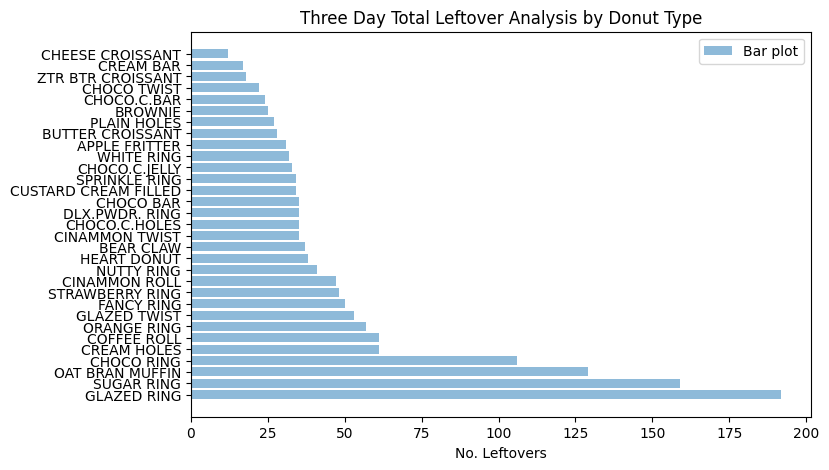

In [442]:
df2 = pd.read_csv('Three Day Analysis Totals - Sheet1.csv', index_col=0)
df.dropna(axis=1, how='all', inplace=True)
# Calculate the total number of leftovers for each food item across all branches
total_leftovers = df2.sum(axis=1)

# Sort the food items by their total leftovers in descending order
sorted_leftovers = total_leftovers.sort_values(ascending=False)

# Plot the total leftovers for each food item in a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(sorted_leftovers.index, sorted_leftovers.values, alpha=0.5, label='Bar plot')
ax.set_title('Three Day Total Leftover Analysis by Donut Type')
ax.set_xlabel('No. Leftovers')
# adjust font size
mpl.rcParams.update({'font.size': 10})
ax.legend()
plt.show()
